In [5]:
# %pip install nltk

In [1]:
import stop_words as sw
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wesleyallen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wesleyallen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
sw.stop_words("The real words are the friends we made along the way.")

['real', 'words', 'friends', 'made', 'along', 'way']

In [8]:
election_data_train = pd.read_csv('data/elections/train/elections_train.csv')
election_data_test = pd.read_csv('data/elections/test/elections_test.csv')



In [9]:
election_data_train.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,elections,The Daily Wire,2,https://www.dailywire.com/news/52178/tulsi-gab...,Tulsi Gabbard Qualifies For Upcoming President...,NaN,NaN,Rep. Tulsi Gabbard ( D-HI ) has officially met...,Rep. Tulsi Gabbard (D-HI) has officially met t...,www.dailywire.com,right,diXbkrezTxsgcoJp
1,elections,Washington Times,2,https://www.washingtontimes.com/news/2019/jun/...,Candidate Hillary Clinton endorsed idea of pol...,2019-06-13,Rowan Scarborough,Hillary Clinton has endorsed the idea of obtai...,Hillary Clinton has endorsed the idea of obtai...,www.washingtontimes.com,right,0ERzAbVMeKjFGiox
2,elections,The Hill,1,https://thehill.com/homenews/campaign/431181-t...,Trump unleashing digital juggernaut ahead of 2020,2019-02-25,NaN,President Trump Donald John TrumpSessions says...,President Trump Donald John TrumpSessions says...,www.thehill.com,center,641HsrEBG9vsQjQT
3,elections,Reuters,1,https://www.reuters.com/article/us-usa-electio...,Russia looms large as U.S. election officials ...,2018-02-19,Dustin Volz,WASHINGTON ( ███ ) - Ten months before the Uni...,WASHINGTON (Reuters) - Ten months before the U...,www.reuters.com,center,yJimQY11fGmT0Dyw
4,elections,Salon,0,http://www.salon.com/2016/03/11/the_republican...,"After the latest debacle, we agree with Donald...",2016-03-11,Elias Isquith,If you ’ re not a masochist — or even if you a...,If you’re not a masochist — or even if you are...,www.salon.com,left,bQm3oIyjS1aGUXP4


In [10]:
election_data_train.loc[0, 'content']

"Rep. Tulsi Gabbard ( D-HI ) has officially met the Democratic National Committee ’ s ( DNC ) threshold to qualify for the upcoming Democratic presidential primary debate in October .\nIn order to nab a podium on the next debate state in Westerville , Ohio , presidential candidates must raise campaign donations from no fewer than 130,000 individual donors and receive at least 2 % of the vote in four or more polls that have been pre-approved by the DNC .\nA certified poll conducted by Monmouth University shows that the Hawaii congresswoman received 2 % support in the early voting state of New Hampshire . The poll , released on Tuesday , marks the final benchmark that she needed to overcome on order to receive an invitation onto the stage .\nGabbard is now the twelfth presidential hopeful to meet the qualifying threshold and subsequently accept an invitation onto the debate stage : Former Vice President Joe Biden , Sen. Cory Booker ( D-NJ ) , South Bend , Indiana Mayor Pete Buttigieg , f

In [11]:
election_data_train['content'] = election_data_train['content'].apply(lambda x: x.lower())

In [12]:
election_data_train.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,elections,The Daily Wire,2,https://www.dailywire.com/news/52178/tulsi-gab...,Tulsi Gabbard Qualifies For Upcoming President...,NaN,NaN,rep. tulsi gabbard ( d-hi ) has officially met...,Rep. Tulsi Gabbard (D-HI) has officially met t...,www.dailywire.com,right,diXbkrezTxsgcoJp
1,elections,Washington Times,2,https://www.washingtontimes.com/news/2019/jun/...,Candidate Hillary Clinton endorsed idea of pol...,2019-06-13,Rowan Scarborough,hillary clinton has endorsed the idea of obtai...,Hillary Clinton has endorsed the idea of obtai...,www.washingtontimes.com,right,0ERzAbVMeKjFGiox
2,elections,The Hill,1,https://thehill.com/homenews/campaign/431181-t...,Trump unleashing digital juggernaut ahead of 2020,2019-02-25,NaN,president trump donald john trumpsessions says...,President Trump Donald John TrumpSessions says...,www.thehill.com,center,641HsrEBG9vsQjQT
3,elections,Reuters,1,https://www.reuters.com/article/us-usa-electio...,Russia looms large as U.S. election officials ...,2018-02-19,Dustin Volz,washington ( ███ ) - ten months before the uni...,WASHINGTON (Reuters) - Ten months before the U...,www.reuters.com,center,yJimQY11fGmT0Dyw
4,elections,Salon,0,http://www.salon.com/2016/03/11/the_republican...,"After the latest debacle, we agree with Donald...",2016-03-11,Elias Isquith,if you ’ re not a masochist — or even if you a...,If you’re not a masochist — or even if you are...,www.salon.com,left,bQm3oIyjS1aGUXP4


In [13]:
left_elections_train = election_data_train[election_data_train['bias'] == 0]
left_elections_train.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
4,elections,Salon,0,http://www.salon.com/2016/03/11/the_republican...,"After the latest debacle, we agree with Donald...",2016-03-11,Elias Isquith,if you ’ re not a masochist — or even if you a...,If you’re not a masochist — or even if you are...,www.salon.com,left,bQm3oIyjS1aGUXP4
7,elections,Daily Beast,0,http://www.thedailybeast.com/articles/2016/02/...,Can Anyone Beat Trump in the Primary? History ...,2016-02-21,Jeff Greenfield,let ’ s say you ’ re a republican who is looki...,Let’s say you’re a Republican who is looking w...,www.thedailybeast.com,left,ssRK5R00fElhRDwf
9,elections,CNN (Web News),0,https://www.cnn.com/2019/06/27/politics/democr...,Harris' attack on Joe Biden steals spotlight a...,2019-06-27,Maeve Reston,( cnn ) democratic voters tuned into thursday ...,(CNN) Democratic voters tuned into Thursday ni...,www.cnn.com,left,vRQSAevQJjnR1xZT
16,elections,Salon,0,http://www.salon.com/2015/05/18/karmic_justice...,Marco Rubio gets his comeuppance: How his Fox ...,2015-05-18,Joan Walsh,the 2016 gop hopeful most helped by jeb bush ’...,The 2016 GOP hopeful most helped by Jeb Bush’s...,www.salon.com,left,LTpG2npyWfTsSnqB
18,elections,The Guardian,0,https://www.theguardian.com/us-news/2016/aug/1...,How Trump's campaign chief got a strongman ele...,2016-08-16,"Luke Harding, Serhiy Leshchenko","paul manafort , who reportedly was a recipient...","Paul Manafort, who reportedly was a recipient ...",www.theguardian.com,left,Rl65sgSkT6wW419l


In [14]:
right_elections_train = election_data_train[election_data_train['bias'] == 2]
right_elections_train.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,elections,The Daily Wire,2,https://www.dailywire.com/news/52178/tulsi-gab...,Tulsi Gabbard Qualifies For Upcoming President...,NaN,NaN,rep. tulsi gabbard ( d-hi ) has officially met...,Rep. Tulsi Gabbard (D-HI) has officially met t...,www.dailywire.com,right,diXbkrezTxsgcoJp
1,elections,Washington Times,2,https://www.washingtontimes.com/news/2019/jun/...,Candidate Hillary Clinton endorsed idea of pol...,2019-06-13,Rowan Scarborough,hillary clinton has endorsed the idea of obtai...,Hillary Clinton has endorsed the idea of obtai...,www.washingtontimes.com,right,0ERzAbVMeKjFGiox
5,elections,CBN,2,http://www1.cbn.com/cbnnews/politics/2016/Marc...,Down and Dirty: Mud Flies at Republican Debate,2016-03-03,NaN,detroit -- the republican presidential contest...,DETROIT -- The Republican presidential contest...,www1.cbn.com,right,K7bY8YrqFBchjDaQ
8,elections,Reason,2,https://reason.com/blog/2017/05/08/macron-win-...,Macron Victory Not Yet a Win for Globalization...,2017-05-08,"Ed Krayewski, Billy Binion, Scott Shackford, J...","emmanuel macron , the former economy minister ...","Emmanuel Macron, the former economy minister w...",www.reason.com,right,V0kGXHPo4uXJyoBL
11,elections,Washington Times,2,http://www.washingtontimes.com/news/2016/apr/8...,Bernie Sanders surrenders: ‘Of course’ Hillary...,2016-04-08,David Sherfinski,sen. bernard sanders on friday said “ of cours...,Sen. Bernard Sanders on Friday said “of course...,www.washingtontimes.com,right,weCcwDuG8j9nsIRS


In [16]:
left_leaning_articles = left_elections_train['content'].values
right_leaning_articles = right_elections_train['content'].values

In [2]:
def get_frequent_words(texts, support=0.1):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    # change X to not show counts, but instead be a 0 or 1 if the word is present
    X[X > 0] = 1
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    frequent_words = word_counts.mean().sort_values(ascending=False)
    
    return frequent_words[frequent_words > support]


In [18]:
get_frequent_words(left_leaning_articles)

said          0.845133
president     0.814159
campaign      0.809735
just          0.763274
new           0.738938
                ...   
particular    0.101770
direction     0.101770
create        0.101770
summer        0.101770
emails        0.101770
Length: 729, dtype: float64

In [19]:
get_frequent_words(right_leaning_articles)

said          0.780488
president     0.756098
new           0.712737
campaign      0.704607
republican    0.650407
                ...   
current       0.100271
claims        0.100271
super         0.100271
answer        0.100271
debates       0.100271
Length: 509, dtype: float64

In [20]:
left_words = set(get_frequent_words(left_leaning_articles).index.to_list())
right_words = set(get_frequent_words(right_leaning_articles).index.to_list())

In [21]:
intersection = set(left_words).intersection(set(right_words))


In [22]:
left_words = left_words - intersection
right_words = right_words - intersection

In [23]:
len(left_words), len(right_words)

(236, 16)

In [24]:
election_data_test = election_data_test[(election_data_test['bias'] == 0) | (election_data_test['bias'] == 2)]

In [25]:
x = election_data_test['content'].values
y = election_data_test['bias'].values

In [3]:
def jaccard_similarity(s1, s2):
    return len(s1.intersection(s2)) / len(s1.union(s2))

def predict_bias(left_words, right_words, x):
    y_pred = []
    for article in x:
        article_words = set(article.split())
        left_similarity = jaccard_similarity(left_words, article_words)
        right_similarity = jaccard_similarity(right_words, article_words)
        if left_similarity > right_similarity:
            y_pred.append(0)
        else:
            y_pred.append(2)
    return y_pred

In [27]:
y_pred = predict_bias(left_words, right_words, x)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.5684549985341542

## Running this algorithm for each of the 5 most popular categories

In [4]:
urls = ['data/elections', 'data/politics', 'data/white_house', 'data/immigration', 'data/healthcare']

In [5]:
def preprocess(url):
    data = pd.read_csv(f'{url}/train/{url.split("/")[-1]}_train.csv')
    
    data['content'] = data['content'].apply(lambda x: x.lower())
    left_leaning = data[data['bias'] == 0]
    right_leaning = data[data['bias'] == 2]
    
    left_articles = left_leaning['content'].values
    right_articles = right_leaning['content'].values
    # print(f'Left leaning articles: {len(left_articles)}')
    # print(f'Right leaning articles: {len(right_articles)}')
    return left_articles, right_articles

In [6]:
def get_frequents_for_all(left_articles, right_articles):
    left_words = set(get_frequent_words(left_articles).index.to_list())
    right_words = set(get_frequent_words(right_articles).index.to_list())
    
    intersection = set(left_words).intersection(set(right_words))
    left_words = left_words - intersection
    right_words = right_words - intersection
    # print(f"Length of left words: {len(left_words)}")
    # print(f"Length of right words: {len(right_words)}")
    return left_words, right_words

In [7]:
def process_test_data(url):
    test_data = pd.read_csv(f'{url}/test/{url.split("/")[-1]}_test.csv')
    test_data = test_data[(test_data['bias'] == 0) | (test_data['bias'] == 2)]
    test_data['content'] = test_data['content'].apply(lambda x: x.lower())
    
    return test_data['content'].values, test_data['bias'].values
    

In [8]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    print(cm)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    # plt.xlabel('True Lables')
    # plt.ylabel('Predicted Labels')
    # plt.title('Confusion Matrix')
    # plt.set_ticklabels(['Left', 'Right'])
    # plt.set_ticklabels(['Left', 'Right'])
    
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(['Left', 'Right'])
    ax.set_yticklabels(['Left', 'Right'])
    plt.show()

In [9]:
def evaluate_model(x, y, left_words, right_words):
    y_pred = predict_bias(left_words, right_words, x)
    cm = confusion_matrix(y, y_pred)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label=2)
    recall = recall_score(y, y_pred, pos_label=2)
    f1 = f1_score(y, y_pred, pos_label=2)
    macrof1 = f1_score(y, y_pred, average='macro')
    microf1 = f1_score(y, y_pred, average='micro')
    plot_confusion_matrix(cm)
    return cm, acc, precision, recall, f1, macrof1, microf1

In [10]:
def run_experiment(url):
    left_articles, right_articles = preprocess(url)
    left_words, right_words = get_frequents_for_all(left_articles, right_articles)
    x, y = process_test_data(url)
    return evaluate_model(x, y, left_words, right_words)

[[1932    3]
 [1469    7]]


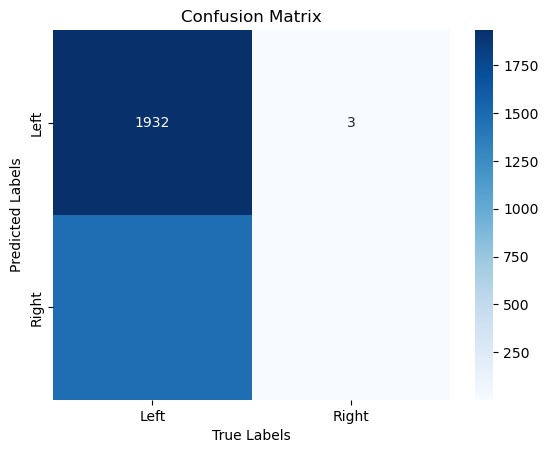

elections accuracy: 0.56845
elections macro f1: 0.36678
elections Macro f1: 0.00942
elections micro f1: 0.56845
elections precision: 0.70000
elections recall: 0.00474


[[758   6]
 [840  14]]


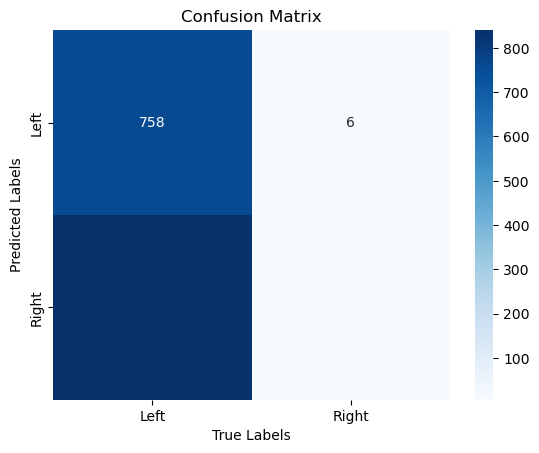

politics accuracy: 0.47713
politics macro f1: 0.33693
politics Macro f1: 0.03204
politics micro f1: 0.47713
politics precision: 0.70000
politics recall: 0.01639


[[500  13]
 [544  25]]


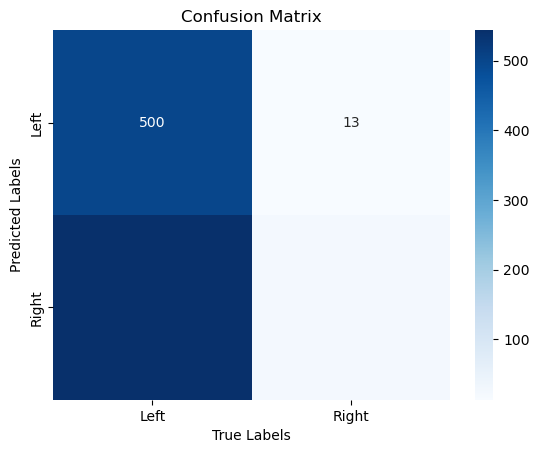

white_house accuracy: 0.48521
white_house macro f1: 0.36232
white_house Macro f1: 0.08237
white_house micro f1: 0.48521
white_house precision: 0.65789
white_house recall: 0.04394


[[310  81]
 [314 210]]


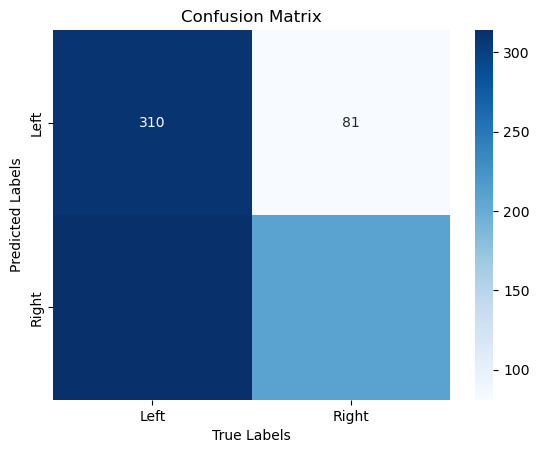

immigration accuracy: 0.56831
immigration macro f1: 0.56309
immigration Macro f1: 0.51534
immigration micro f1: 0.56831
immigration precision: 0.72165
immigration recall: 0.40076


[[379  43]
 [343 138]]


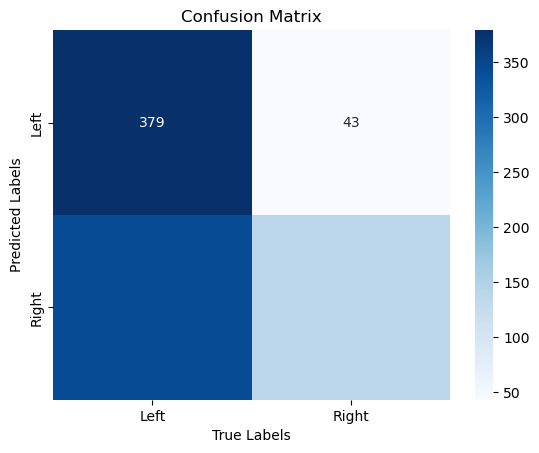

healthcare accuracy: 0.57254
healthcare macro f1: 0.53975
healthcare Macro f1: 0.41692
healthcare micro f1: 0.57254
healthcare precision: 0.76243
healthcare recall: 0.28690


Average accuracy: 0.53433
Average macro f1: 0.43377
Average Macrof1: 0.21122
Average micro f1: 0.53433
Average precision: 0.70840
Average recall: 0.15055


In [11]:
avg_accuracy = 0
avg_recall = 0
avg_precision = 0
avg_f1 = 0
avg_macrof1 = 0
avg_microf1 = 0
cms = []
for url in urls:
    topic = url.split('/')[-1]
    cm, acc, precision, recall, f1, macrof1, microf1 = run_experiment(url) 
    avg_macrof1 += macrof1
    avg_accuracy += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_microf1 += microf1
    cms.append(cm)
    print(f"{topic} accuracy: {acc:.5f}")
    print(f"{topic} macro f1: {macrof1:.5f}")
    print(f"{topic} Macro f1: {f1:.5f}")
    print(f"{topic} micro f1: {microf1:.5f}")
    print(f"{topic} precision: {precision:.5f}")
    print(f"{topic} recall: {recall:.5f}\n\n")
    
    

avg_accuracy /= len(urls)
avg_recall /= len(urls)
avg_precision /= len(urls)
avg_f1 /= len(urls)
avg_macrof1 /= len(urls)
avg_microf1 /= len(urls)

print(f"Average accuracy: {avg_accuracy:.5f}")
print(f"Average macro f1: {avg_macrof1:.5f}")
print(f"Average Macrof1: {avg_f1:.5f}")
print(f"Average micro f1: {avg_microf1:.5f}")
print(f"Average precision: {avg_precision:.5f}")
print(f"Average recall: {avg_recall:.5f}")



In [14]:
cm = sum(cms)
results = pd.DataFrame(cm, columns=['Predicted Left', 'Predicted Right'], index=['Actual Left', 'Actual Right'])
results

,Predicted Left,Predicted Right
Actual Left,3879,146
Actual Right,3510,394


In [15]:
cols = ['Accuracy', 'Precision', 'Recall', 'F1']
vals = [[avg_accuracy, avg_precision, avg_recall, avg_f1]]
data_metrics = pd.DataFrame(vals, columns=cols, index=['Frequent Itemsets'])
data_metrics

,Accuracy,Precision,Recall,F1
Frequent Itemsets,0.534328,0.708395,0.150548,0.211217
